In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
df = pd.read_csv('../input/Mall_Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={"Annual Income (k$)":"AIncome","Spending Score (1-100)":"Score"},inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,AIncome,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
AIncome       0
Score         0
dtype: int64

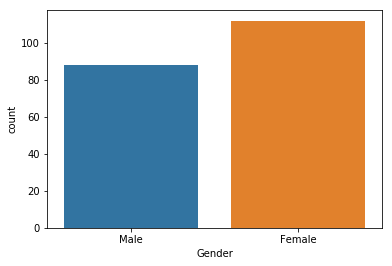

In [8]:
sns.countplot(data=df, x='Gender')

Text(0.5,0,'Age')

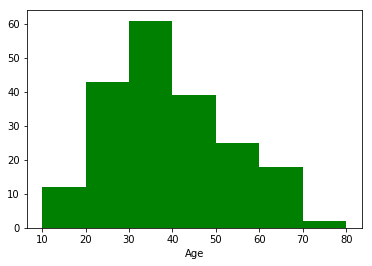

In [9]:
plt.hist(data=df,x='Age',bins=[10,20,30,40,50,60,70,80],color='Green')
plt.xlabel('Age')

(array([12., 18., 16., 26., 20., 32., 38., 16.,  8.,  6.,  2.,  4.,  2.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140]),
 <a list of 13 Patch objects>)

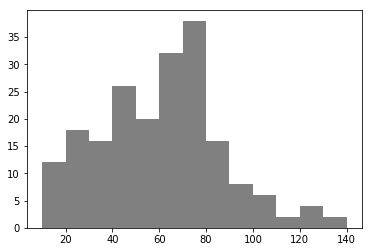

In [10]:
plt.hist(data=df,x='AIncome',bins=[10,20,30,40,50,60,70,80,90,100,110,120,130,140],color='Grey')

# Modelling our data

In [11]:
X = df.drop(columns=['CustomerID', 'Gender', 'AIncome'])
X.head()

,Age,Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0,0.5,'Spending Score')

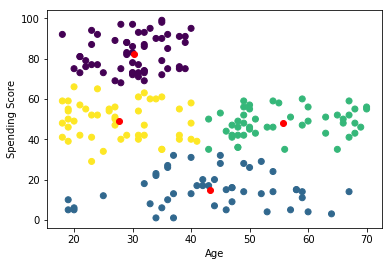

In [14]:
x=df['Age']
y=df['Score']

plt.scatter(x,y,c=labels)
plt.scatter(centroids[:,0],centroids[:,1],color='red')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [15]:
X2 = df.drop(columns=['CustomerID','Gender','Age'])
X2.head()

,AIncome,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
kmeans2 = KMeans(n_clusters=4).fit(X2)
labels2 = kmeans2.labels_
centroid2 = kmeans2.cluster_centers_

Text(0,0.5,'Spending Score')

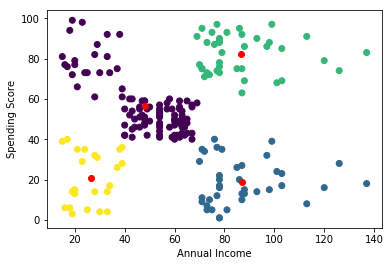

In [17]:
x2 = df['AIncome']
y2 = df['Score']

plt.scatter(x2,y2,c=labels2)
plt.scatter(centroid2[:,0],centroid2[:,1],color='red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')